# Задание 3-4. Идентификация динамического объекта регрессионным МНК

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
!pip install control
from control import * 
from control.matlab import *

## Определение переходной функции вида: $$ W(S) = \frac{S^2 + 7S + 2}{9S^2+ 26S + 24} $$

In [2]:
w = tf([1, 7, 2], [9, 26, 24]);

## Реакция переходной функции на ступенчатое воздействие

In [3]:
y, x = step(w)

## Добавление нормальной ошибки

In [4]:
y_err = y + np.random.normal(scale=0.005, size=len(y))

## Вывод графиков 
- зеленая линия - идеальная реакция
- синяя линия - зашумленная реакция

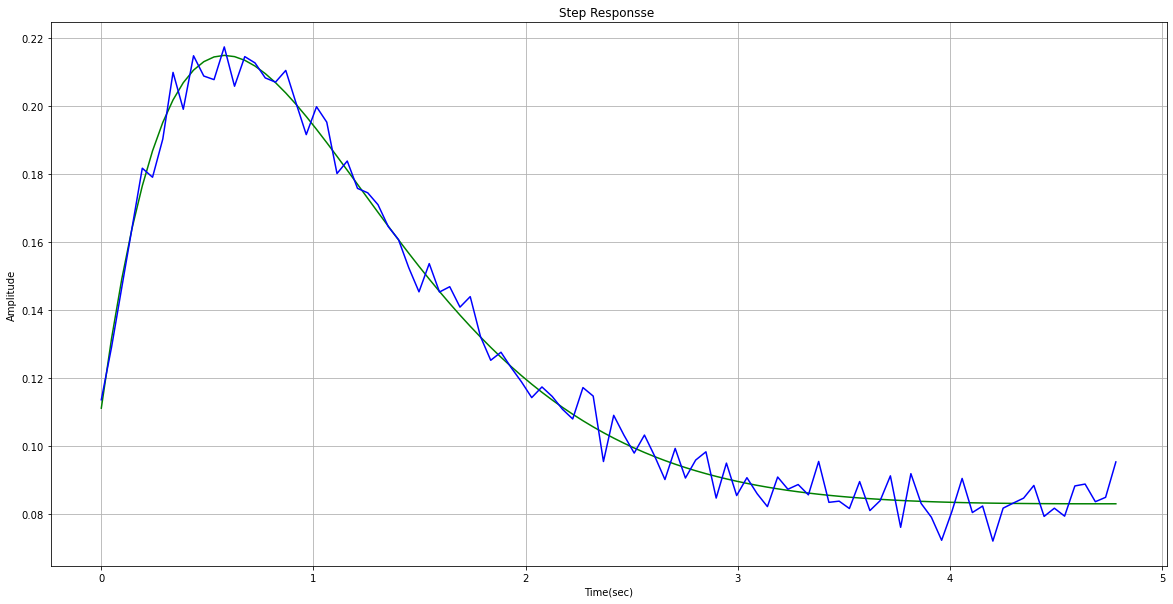

In [5]:
plt.figure(figsize=(20,10))
plt.plot(x,y,"g")
plt.plot(x,y_err,"b")
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

## Индентификация модели

In [6]:
psi = np.array([[y[i + 1], y[i], 1 ,1] for i in range(0, len(y) - 2)])

koef = np.dot(np.dot(np.linalg.pinv(np.dot(psi.T, psi)), psi.T), y[2:])
print("Полученные коэффициенты: ", koef)

Полученные коэффициенты:  [ 1.86394410e+00 -8.69749003e-01  2.41870818e-04  2.41870818e-04]


## Валидация модели

In [7]:
y_new = [y[0], y[1]]

temp = np.array([y[1], y[0], 1, 1])

for k in range(len(y) - 2):
    y_new.append(np.dot(koef, temp))
    temp =  np.array([y_new[-1], temp[0], 1, 1])

## Вывод графиков 
- зеленая линия - смешенная вверх (для наглядности) идеальная реакция
- синяя линия - зашумленная реакция
- красная линия - реакция полученной модели

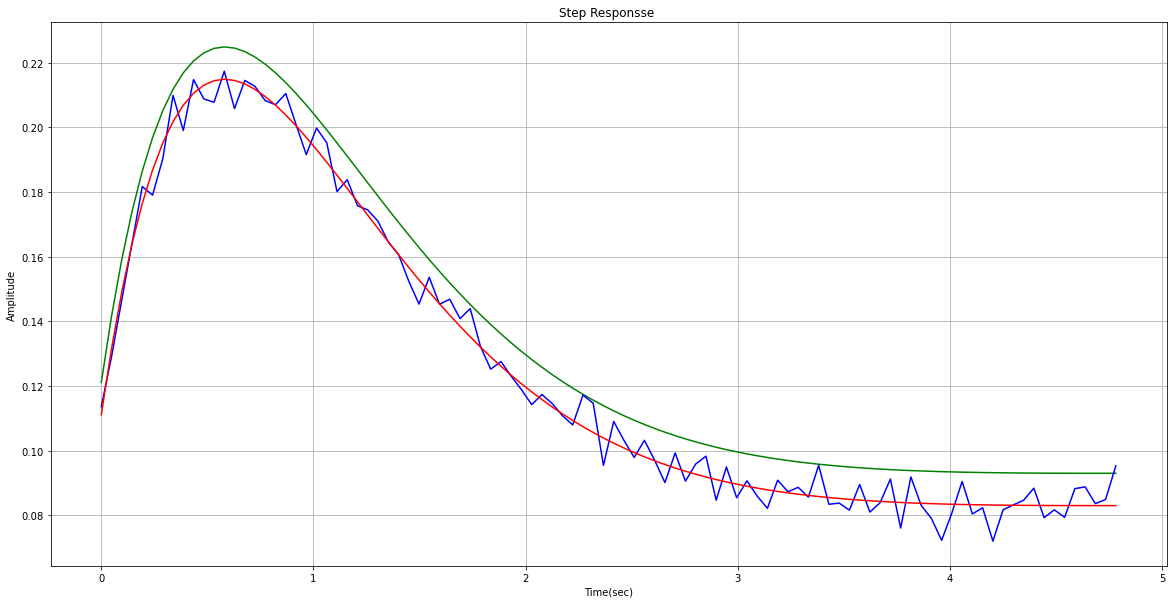

In [8]:
plt.figure(figsize=(20,10))
plt.plot(x,[i+0.01 for i in y],"g")
plt.plot(x,y_err,"b")
plt.plot(x,y_new,"r")
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

## Ошибки

In [9]:
print("СКО между зашумленным и идеальным сигналом: ", sum([(i - j)**2 for i, j in zip(y_err, y)]) / len(y))
print("СКО между моделью и идеальным сигналом: ", sum([(i - j)**2 for i, j in zip(y_new, y)]) / len(y))

СКО между зашумленным и идеальным сигналом:  2.3813312483188773e-05
СКО между моделью и идеальным сигналом:  1.3209842918082827e-23
